# **ภานุพงศ์ สนไชย 6610210301**

# Assignment 03 - Filtering

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import colorsys
import cv2

%matplotlib inline

# Utility functions to read, to display, and to save an image

def read_img(path, greyscale=True):
    img = Image.open(path)
    if greyscale:
        img = img.convert('L')
    else:
        img = img.convert('RGB')
    return np.array(img).astype(float)


def show(img_array, cmap=None, title=""):
    plt.figure(figsize=(5,5))
    plt.axis('off')
    plt.title(title)
    if cmap is None:
        plt.imshow(img_array, cmap="gray", vmin=0, vmax=255)
    else:
        plt.imshow(img_array, cmap=cmap, vmin=0, vmax=255)
    plt.show()


def save_img(img, path):
    img = img - img.min()
    img = img / img.max()
    img = (img * 255).astype(np.uint8)
    img = Image.fromarray(img)
    img.save(path)
    print(path, "is saved!")


def convolve(image, kernel):
    output = scipy.ndimage.convolve(image, kernel, mode='constant', cval=0.0)
    return output

## Question 1

In [14]:
def edge_detection(image):
    """
    Return Ix, Iy and the gradient magnitude of the input image

    Input- image: H x W
    Output- Ix, Iy, grad_magnitude: H x W
    """
    # TODO: Find kx, ky
    kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
    ky = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])

    Ix = convolve(image, kx)
    Iy = convolve(image, ky)

    # TODO: Use Ix, Iy to calculate grad_magnitude
    grad_magnitude = np.sqrt(Ix**2 + Iy**2)

    return Ix, Iy, grad_magnitude

## Question 2

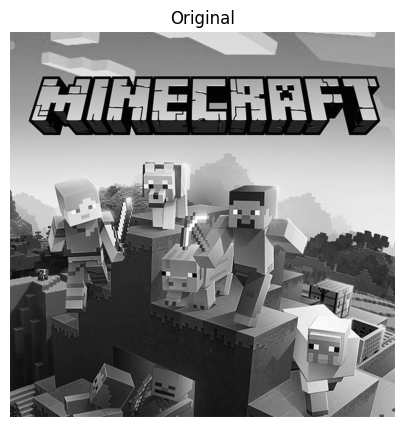

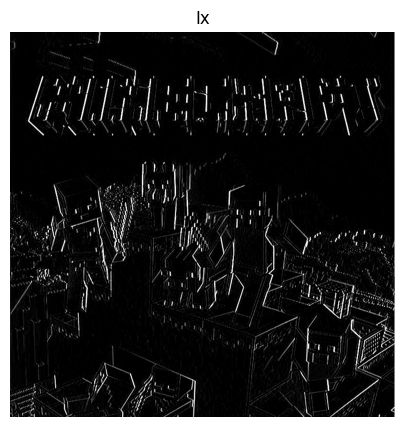

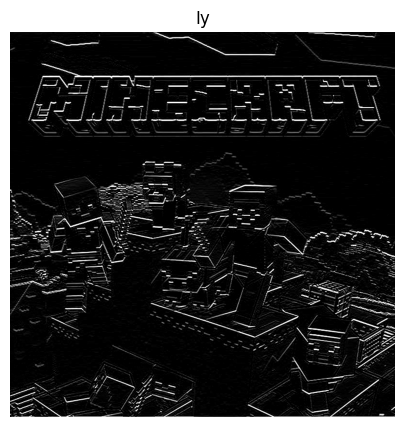

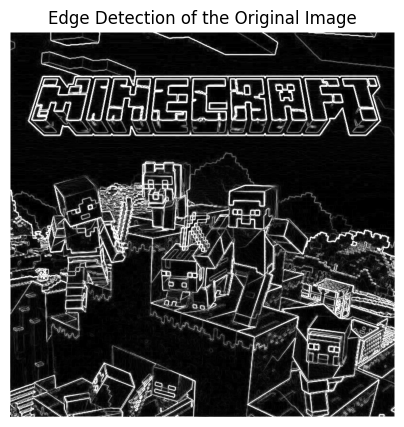

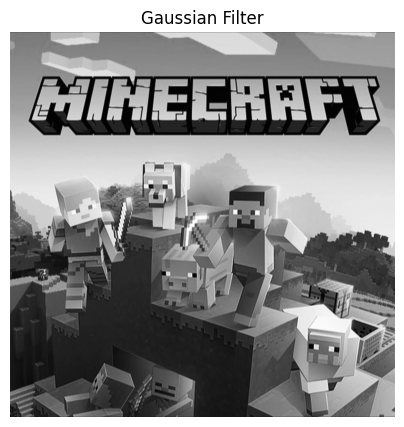

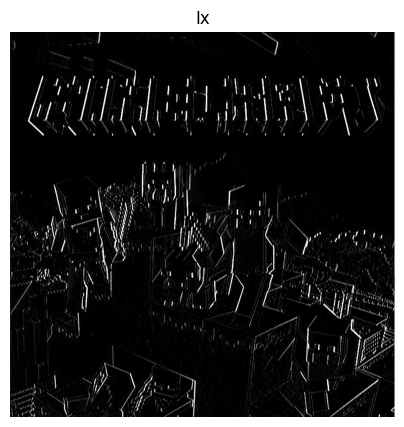

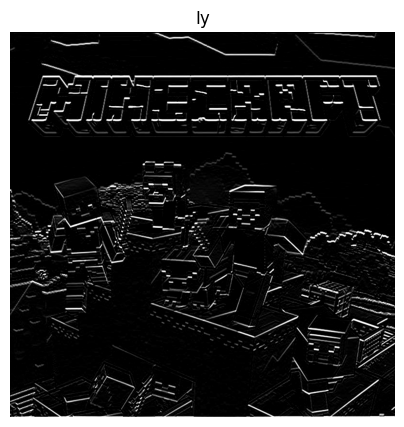

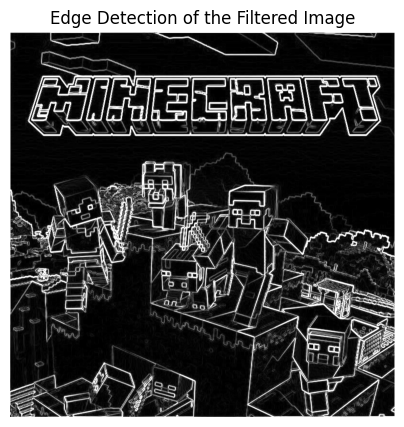

In [16]:
img = read_img('/content/minecraft-1639513933156.jpg')
show(img, title="Original")

# Use edge_detection() to detect edges for the orignal image.
Ix, Iy, grad_mag = edge_detection(img)
show(Ix, title="Ix")
show(Iy, title="Iy")
show(grad_mag, title="Edge Detection of the Original Image")

# Apply Gaussian Filter to the image.
kernel_gaussian = cv2.getGaussianKernel(ksize=3, sigma=7)
filtered_gaussian = convolve(img, kernel_gaussian)
show(filtered_gaussian, title="Gaussian Filter")

# Use edge_detection() to detect edges for the gaussian filtered image.
Ix, Iy, grad_mag = edge_detection(filtered_gaussian)
show(Ix, title="Ix")
show(Iy, title="Iy")
show(grad_mag, title="Edge Detection of the Filtered Image")

ภาพที่ได้จากการที่ทำ gaussian filter มีเส้นขอบน้อยกว่า original มี nosie น้อยกว่า เห็นแต่ขอบหลักๆ